In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

#!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
#!pip install googletrans==4.0.0-rc1

#import preprocess_kgptalkie as kgptalkie

#df['wordcounts'] = df['message'].apply(lambda x: kgptalkie.word_count(x))
#df['charcounts'] = df['message'].apply(lambda x: kgptalkie.char_count(x))
#df['avg_word_len'] = df['message'].apply(lambda x: kgptalkie.avg_word_len(x))
#df['stop_words_count'] = df['message'].apply(lambda x: kgptalkie.stop_words_count(x))
#df['digit_count'] = df['message'].apply(lambda x: sum(c.isdigit() for c in str(x)))
#df['uppercase_count'] = df['message'].apply(lambda x: kgptalkie.upper_case_count(x))



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [5]:
df.tail(3)

,label,message,wordcounts,charcounts,avg_word_len,stop_words_count,digit_count,uppercase_count
5569,ham,"Pity, * was in mood for that. So...any other s...",10,48,4.800000,4,0,0
5570,ham,The guy did some bitching but I acted like i'd...,26,100,3.846154,16,0,1
5571,ham,Rofl. Its true to its name,6,21,3.500000,4,0,0


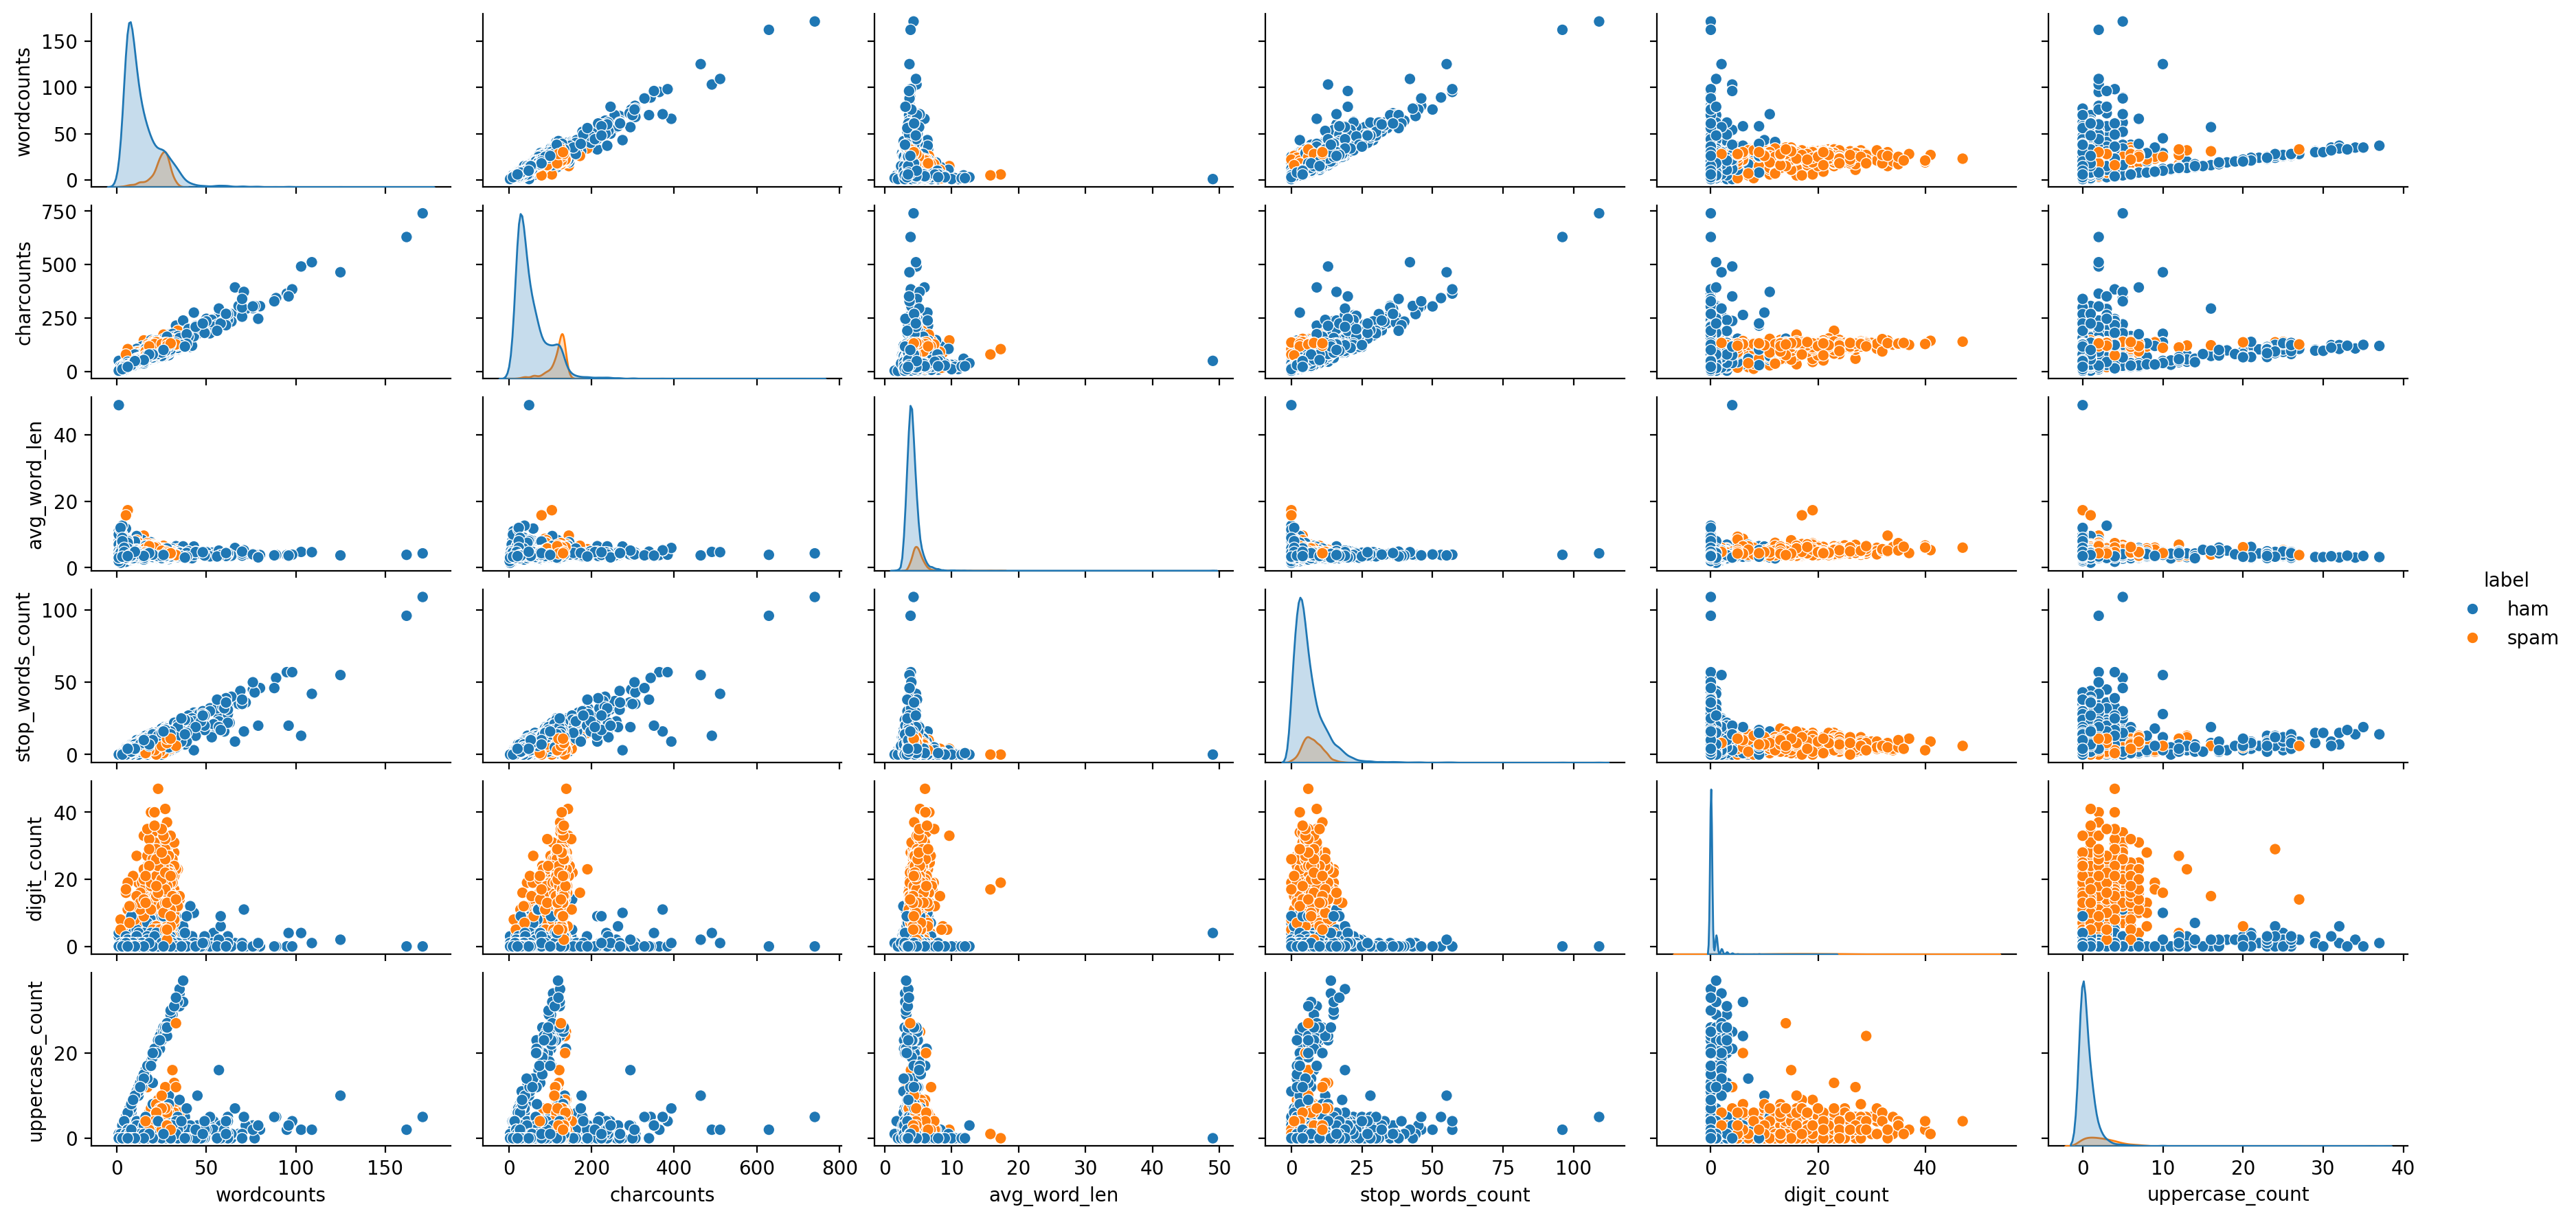

In [ ]:
plt.rcParams['figure.dpi'] = 200
sns.pairplot(df, hue = 'label', height = 1.5, aspect = 2)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df.head(3)

,label,message,wordcounts,charcounts,avg_word_len,stop_words_count,digit_count,uppercase_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,92,4.600000,5,0,0
1,ham,Ok lar... Joking wif u oni...,6,24,4.000000,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128,4.571429,6,25,2


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size = 0.2, random_state = 0, stratify = df['label'])

In [9]:
df.head(3)

,label,message,wordcounts,charcounts,avg_word_len,stop_words_count,digit_count,uppercase_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,92,4.600000,5,0,0
1,ham,Ok lar... Joking wif u oni...,6,24,4.000000,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128,4.571429,6,25,2


In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
x_train
#x_test
#y_train
#y_test

,message
1257,"Not yet chikku..going to room nw, i'm in bus.."
5461,Ok i thk i got it. Then u wan me 2 come now or...
1613,RT-KIng Pro Video Club>> Need help? info@ringt...
2179,"I don,t think so. You don't need to be going o..."
2638,No I don't have cancer. Moms making a big deal...
...,...
3299,This message is free. Welcome to the new & imp...
1054,Jay's getting really impatient and belligerent
245,U don't remember that old commercial?
1235,Hello-/@drivby-:0quit edrunk sorry iff pthis m...


In [13]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [14]:
df.head(3)

,label,message,wordcounts,charcounts,avg_word_len,stop_words_count,digit_count,uppercase_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,92,4.600000,5,0,0
1,ham,Ok lar... Joking wif u oni...,6,24,4.000000,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,128,4.571429,6,25,2


In [15]:
print(x_test)
print(x_test.shape)

  (0, 1592)	0.21544051718294177
  (0, 1604)	0.41677467562752785
  (0, 1616)	0.23581124326235303
  (0, 1628)	0.3573373611443904
  (0, 2402)	0.30474201501247483
  (0, 3903)	0.3573373611443904
  (0, 4827)	0.2250887470097201
  (0, 6673)	0.3912445151351952
  (0, 6905)	0.1439085175092202
  (0, 7444)	0.262786342009285
  (0, 7482)	0.24604787789282648
  (0, 7669)	0.14827858908749103
  (1, 2294)	0.29191713519540075
  (1, 2299)	0.41189005108921734
  (1, 3153)	0.24062207736462554
  (1, 3174)	0.3402021700749916
  (1, 3348)	0.20119550617366486
  (1, 3406)	0.2868466030290617
  (1, 3636)	0.1740084558806233
  (1, 3743)	0.17816869046857448
  (1, 4650)	0.19053211431221018
  (1, 5170)	0.2838836646939589
  (1, 6431)	0.3911509041870266
  (1, 6905)	0.13071643523892157
  (1, 7448)	0.28564367778595
  :	:
  (1111, 4699)	0.23874784537611074
  (1111, 4753)	0.22410756270491383
  (1111, 4780)	0.12654254802292672
  (1111, 4815)	0.11763887513191222
  (1111, 5268)	0.2885859756065648
  (1111, 6715)	0.2521830734468944
 

In [16]:
print(len(tfidf.get_feature_names_out()))


7708


In [17]:
#print(x_train)
#print(x_test)
y_train
y_test

,label
2461,ham
461,ham
2628,ham
1566,ham
1506,ham
...,...
1041,ham
3458,ham
3681,ham
2895,ham


In [18]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
x_train.toarray().shape

(4457, 7708)

In [20]:
x_train

<4457x7708 sparse matrix of type '<class 'numpy.float64'>'
	with 59315 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [22]:
svm = LinearSVC()
svm.fit(x_train, y_train)

LinearSVC()

In [23]:
y_pred = svm.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.97      0.88      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [51]:
ask = str(input('Enter your message: '))
text = [ask]
text = tfidf.transform(text)
text.toarray().shape
svm.predict(text)



Enter your message: You got a prize bond from government, recieve it by clicking on this link


array(['spam'], dtype=object)

In [56]:
import pickle
import os

In [57]:
os.makedirs('model_nlp', exist_ok=True)
pickle.dump(tfidf, open('model_nlp/tfidf.pkl', 'wb'))
pickle.dump(svm, open('model_nlp/svm.pkl', 'wb'))